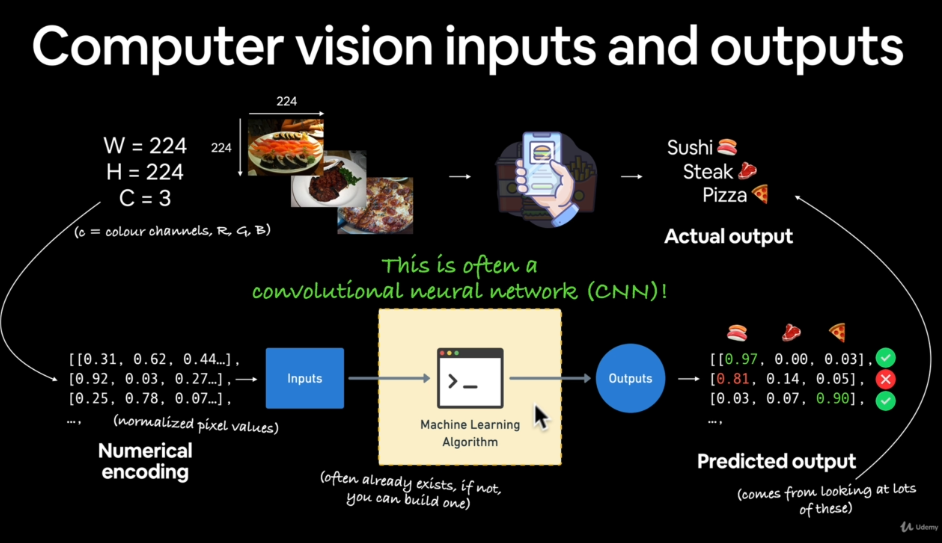

# What is CNN?


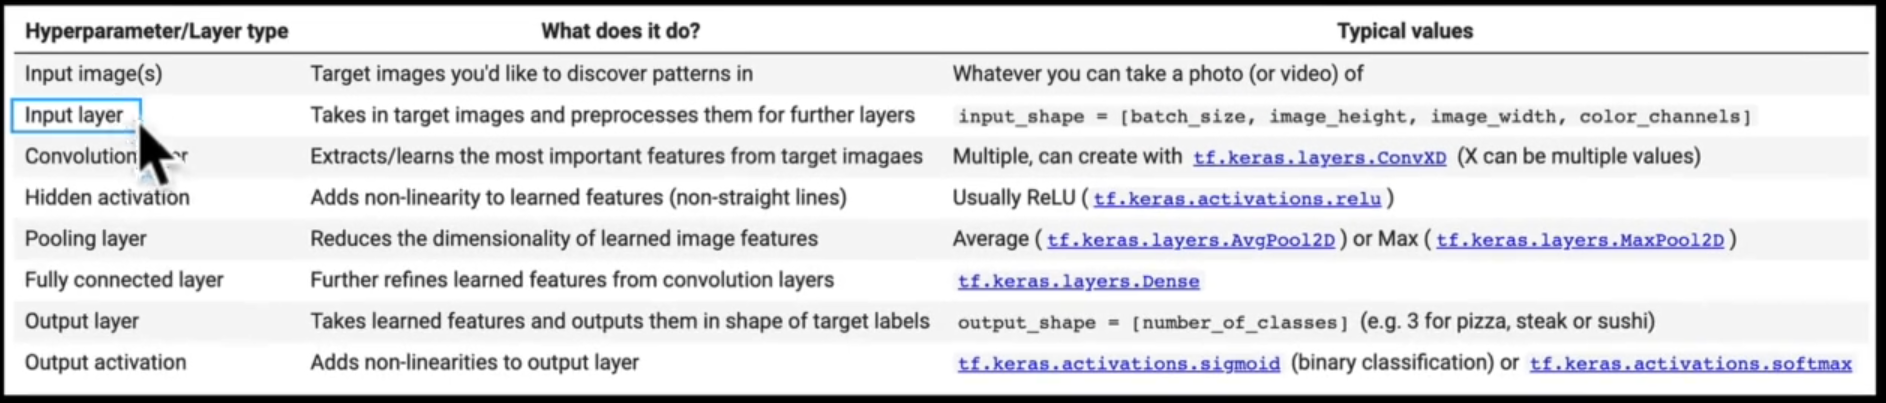

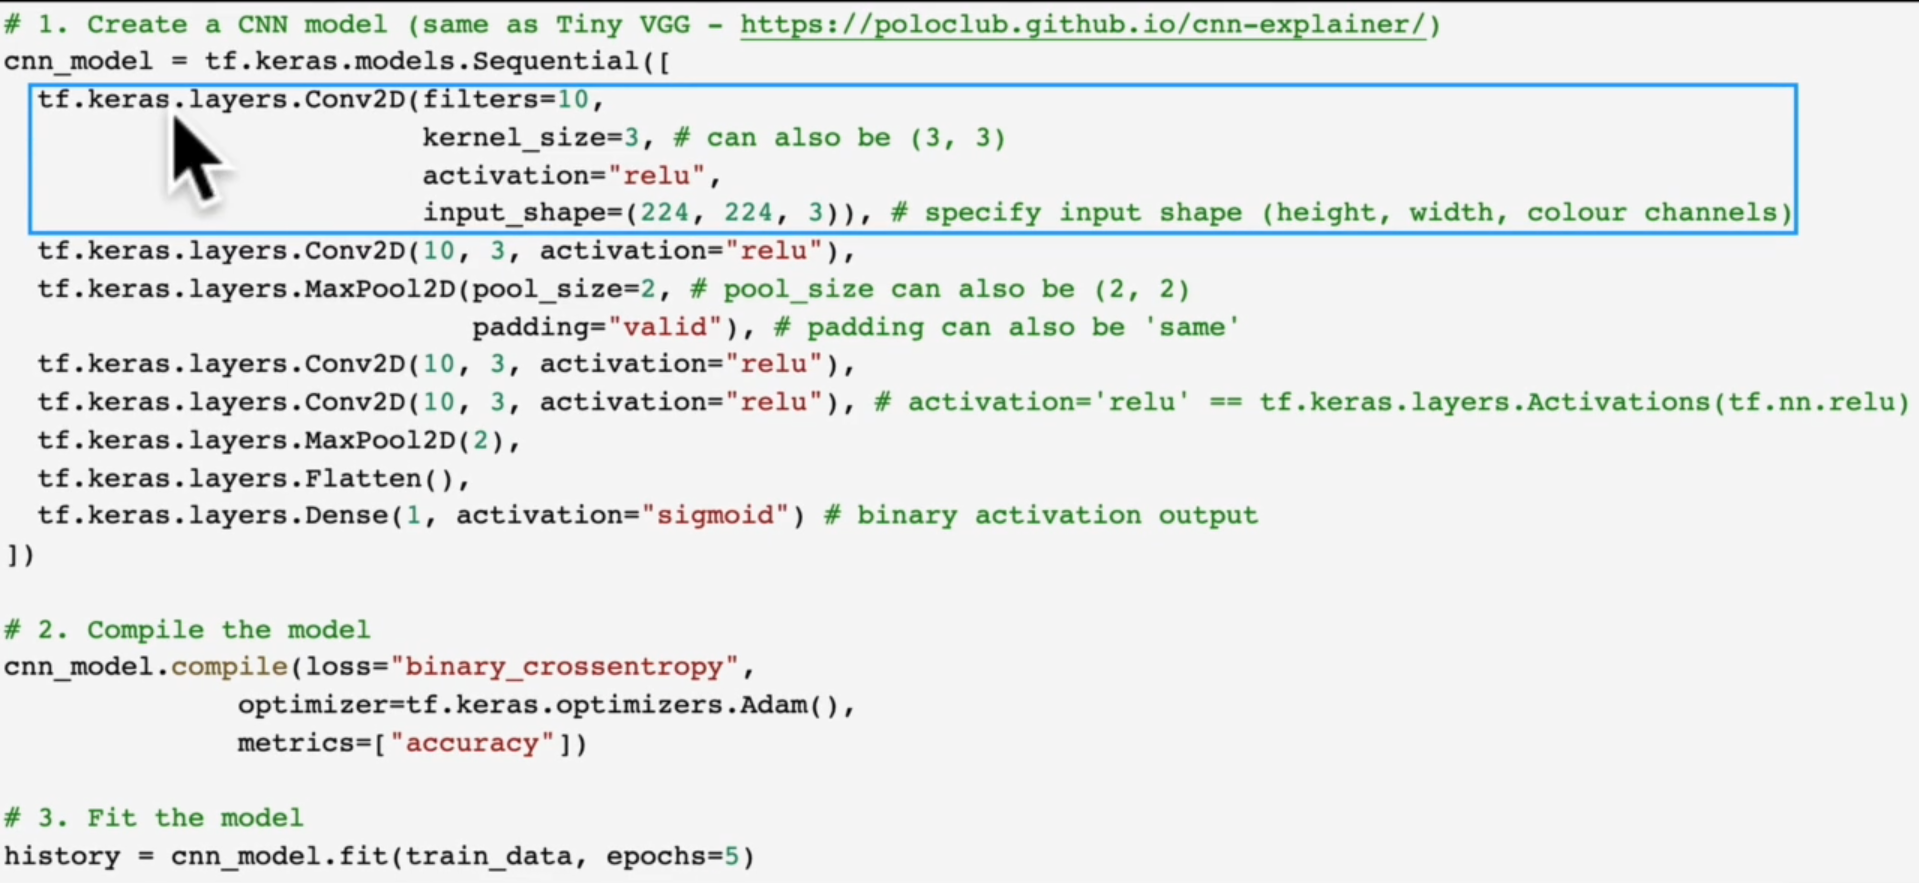

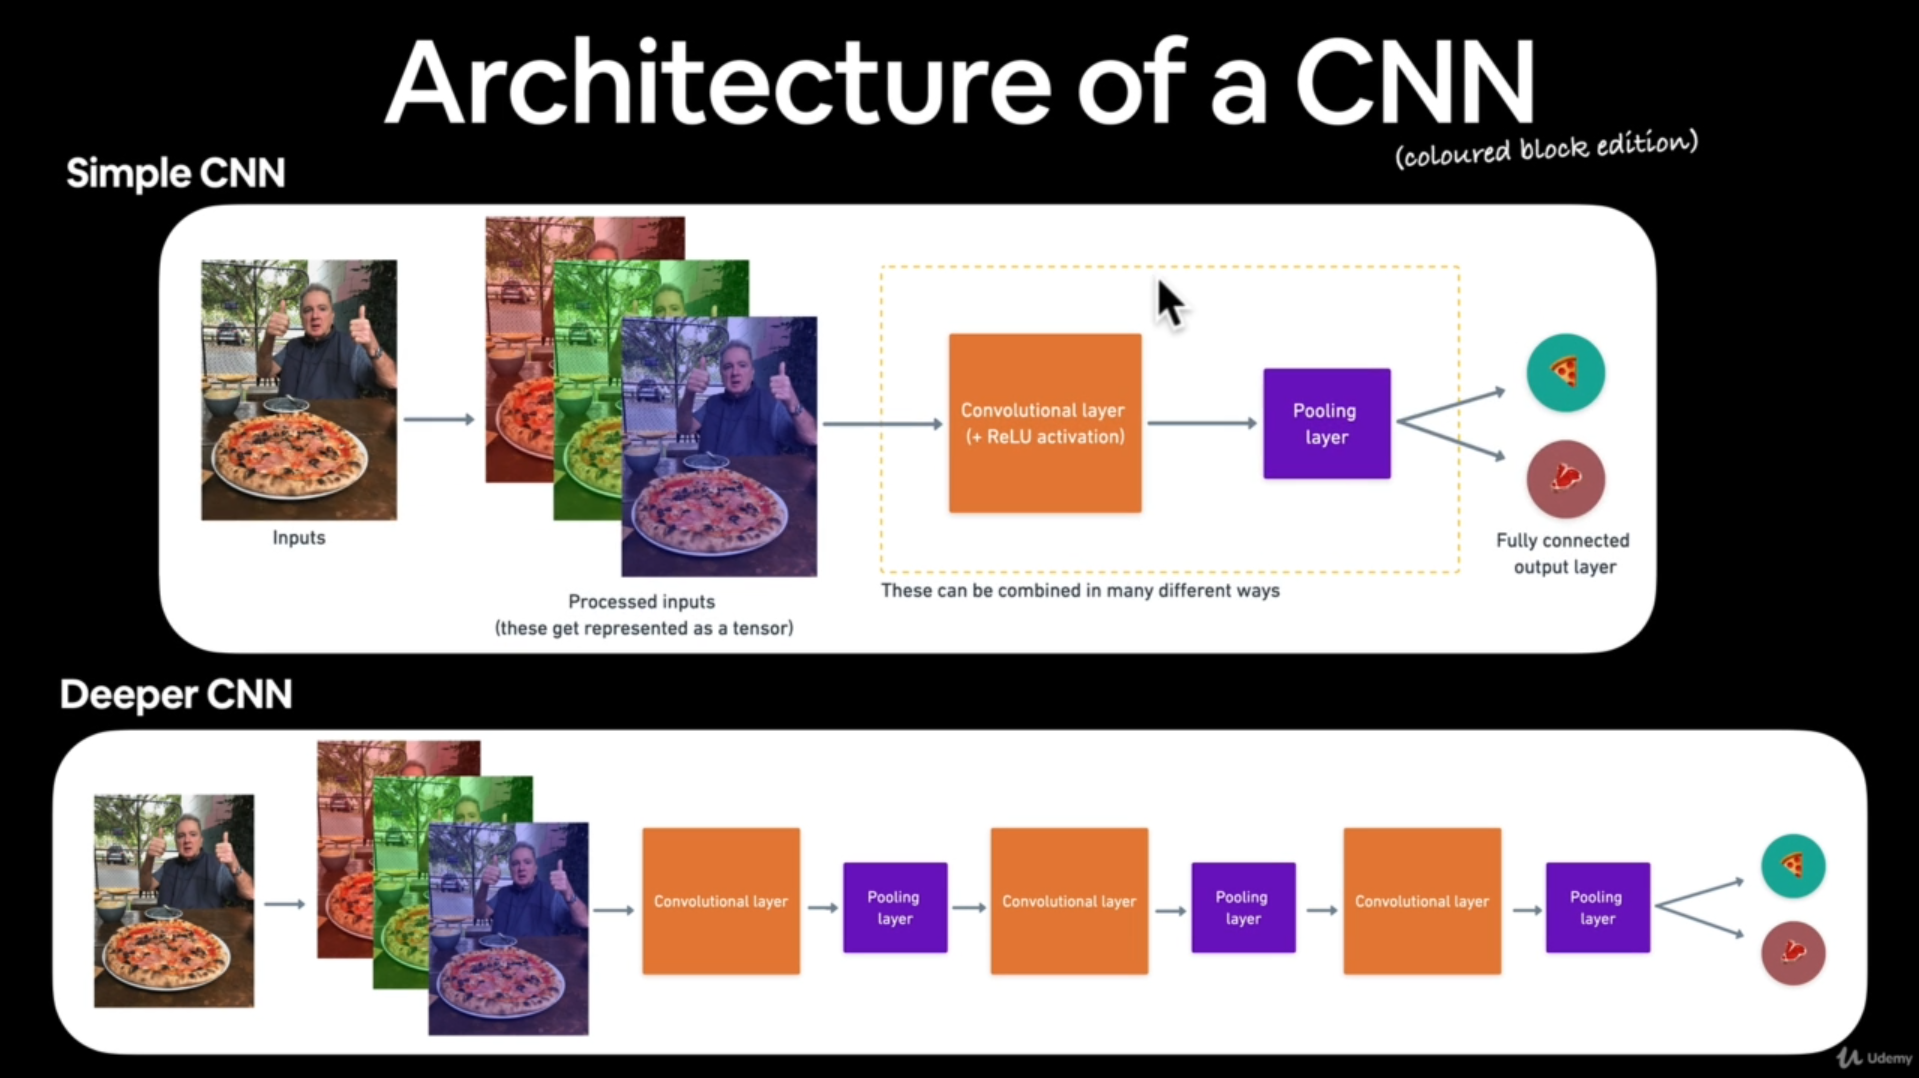

In [ ]:
!cp -r /content/drive/MyDrive/pizza_steak  /content/Data

In [ ]:
# We got the data from Kaggle Food 101 but only 2 classes not whole

## Inspect the data now
 Become one with the data means visualize the data as um as possible


In [ ]:
!ls

data/  drive/  sample_data/


In [ ]:
!cd data

In [ ]:
!ls

data  drive  sample_data


In [1]:
import os

# Walk through pizza steak data directory and list no of files
for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

there are 2 directories and 0 images in data/pizza_steak.
there are 2 directories and 0 images in data/pizza_steak\test.
there are 0 directories and 250 images in data/pizza_steak\test\pizza.
there are 0 directories and 250 images in data/pizza_steak\test\steak.
there are 2 directories and 0 images in data/pizza_steak\train.
there are 0 directories and 750 images in data/pizza_steak\train\pizza.
there are 0 directories and 750 images in data/pizza_steak\train\steak.


In [2]:
# Another way to find out the no of images in our directory
num_steak_image_train = len(os.listdir('data/pizza_steak/train/steak'))
num_steak_image_test = len(os.listdir('data/pizza_steak/test/steak'))

num_pizza_image_train = len(os.listdir('data/pizza_steak/train/pizza'))
num_pizza_image_test = len(os.listdir('data/pizza_steak/test/pizza'))

print(num_steak_image_train,
      num_steak_image_test,
      num_pizza_image_train,
      num_pizza_image_test)

750 250 750 250


### To visualize our images, first lets get the class names programmatically

In [3]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('data/pizza_steak/train')

# Lets create a list of class anmes from the sub directories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [4]:
# Lets visualise the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Set up the target dir
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}")
  return img


['1173913.jpg']
Image shape: (512, 512, 3)


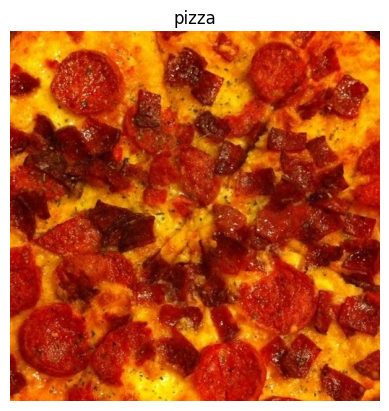

In [5]:
img = view_random_image('data/pizza_steak/train/', 'pizza')

In [6]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[116,  43,   8],
        [106,  31,   0],
        [114,  37,  11],
        ...,
        [ 43,   3,   3],
        [ 40,   5,   3],
        [ 40,   6,   4]],

       [[ 95,  21,   0],
        [ 98,  22,   0],
        [112,  32,   7],
        ...,
        [ 43,   2,   0],
        [ 41,   3,   2],
        [ 40,   5,   1]],

       [[ 96,  17,   0],
        [ 99,  18,   0],
        [115,  31,   5],
        ...,
        [ 48,   4,   1],
        [ 47,   6,   4],
        [ 46,   7,   2]],

       ...,

       [[219,  90,   6],
        [211,  82,   0],
        [216,  87,   6],
        ...,
        [133,  34,   2],
        [130,  31,   0],
        [126,  27,   0]],

       [[232, 103,   9],
        [227,  98,   6],
        [233, 104,  13],
        ...,
        [126,  36,   2],
        [124,  34,   0],
        [117,  26,   0]],

       [[252, 124,  23],
        [247, 119,  20],
        [248, 118,  24],
        ...,
        [126,  40,   

In [7]:
# Get the shape of the img
img.shape


(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.0

array([[[0.52156863, 0.44313725, 0.31372549],
        [0.52156863, 0.44313725, 0.31372549],
        [0.52156863, 0.44313725, 0.31372549],
        ...,
        [0.58823529, 0.50588235, 0.43137255],
        [0.59607843, 0.51372549, 0.43921569],
        [0.60392157, 0.52156863, 0.44705882]],

       [[0.51372549, 0.43921569, 0.30980392],
        [0.51372549, 0.43921569, 0.30980392],
        [0.51372549, 0.43921569, 0.30980392],
        ...,
        [0.58431373, 0.50196078, 0.41960784],
        [0.59215686, 0.50980392, 0.42745098],
        [0.59607843, 0.51372549, 0.43137255]],

       [[0.50980392, 0.44705882, 0.31764706],
        [0.50980392, 0.44705882, 0.31764706],
        [0.50980392, 0.44705882, 0.31764706],
        ...,
        [0.58431373, 0.50588235, 0.40784314],
        [0.58823529, 0.50980392, 0.41176471],
        [0.59215686, 0.51372549, 0.41568627]],

       ...,

       [[0.29411765, 0.23137255, 0.12941176],
        [0.29411765, 0.23137255, 0.12941176],
        [0.29411765, 0

# Building an end to end architecture of CNN
Lets build a CNN model to find the patterns in our images, more specifically we need a way to:
* Load our image
* Preprocess image
* Build a CNN to find patter
* Compile the CNN
* Fir the CNN to training data

In [2]:
!cp -r /content/drive/MyDrive/pizza_steak /content/data

In [10]:
print(type(train_data))
print(type(valid_data))
print(len(train_data), len(valid_data))


<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
47 16


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess the image
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up the path to our data directories
train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42
                                               )

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42
                                               )


# Build a CNN model (same as the tiny VGG on the CNN explainer website (img at very starting))

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu',
        input_shape = (224, 224, 3)), # 3 is color channels here
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])


# Compile our CNN
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)



# Fit the model
# history1 = model1.fit(train_data, # The train data here creates both features and label as we have done above
#                       epochs = 5,
#                       steps_per_epoch = len(train_data),
#                       validation_data = valid_data,
#                       validation_steps = len(valid_data))

history1 = model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data))





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.5532 - loss: 0.6677
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.7917 - loss: 0.4615
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 268ms/step - accuracy: 0.8103 - loss: 0.4323


<Axes: >

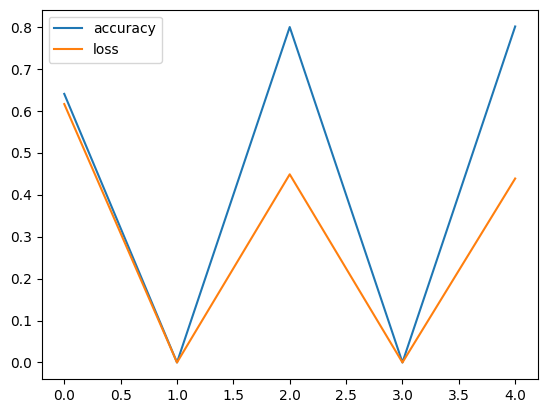

In [12]:
import pandas as pd
pd.DataFrame(history1.history).plot()

In [13]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Create a model we studied in prev section to see if that works with image data or not

In [15]:
# Set the random_seed
tf.random.set_seed(42)

# Create the mdel
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


history2 = model2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.4998 - loss: 0.7175
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.4974 - loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5194 - loss: 0.6931


<Axes: >

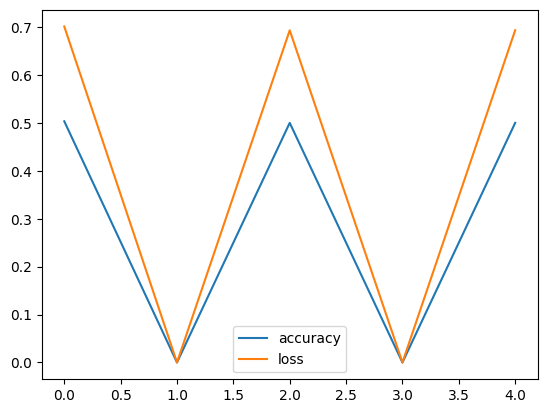

In [16]:
pd.DataFrame(history2.history).plot()

### Lets improve the model2

In [18]:
# Set the random_seed
tf.random.set_seed(42)

# Create the mdel
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)


history3 = model3.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data)
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4672 - loss: 8.6943
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5177 - loss: 0.6926
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.4769 - loss: 0.6946
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.4817 - loss: 0.6934
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4981 - loss: 0.6932
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


<Axes: >

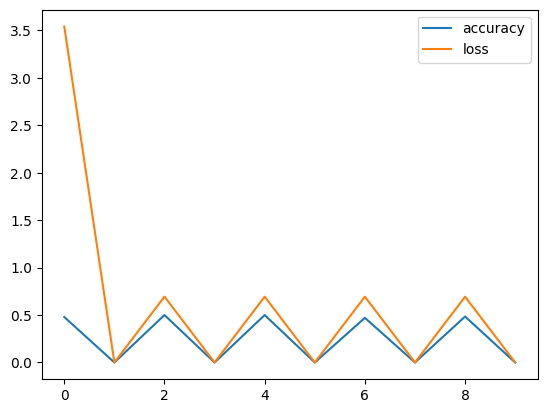

In [19]:
pd.DataFrame(history3.history).plot()

In [20]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │     1,204,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,613,157 (13.78 MB)

 Trainable params: 1,204,385 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,408,772 (9.19 MB)

# Let's break it down
Break down all the stpes used here
1. Become one with data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust diff parameters to improve the mode
7. Repeat until satisfied


## Become one with data

['1337814.jpg']
Image shape: (512, 512, 3)
['52934.jpg']
Image shape: (512, 384, 3)


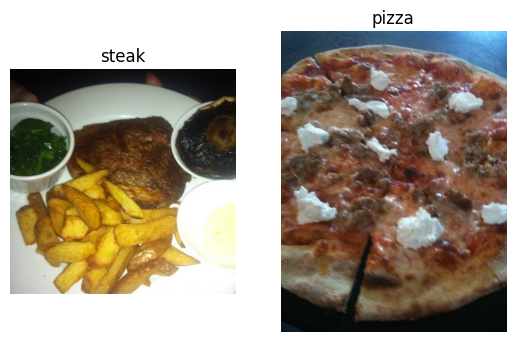

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('data/pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('data/pizza_steak/train/', 'pizza')

## Preprocess the data

In [4]:
# Split data into training and testing
train_dir = 'data/pizza_steak/train/'
test_dir = 'data/pizza_steak/test/'


Turn the data into **batches**
* Batch is a small subset of data, rather than using all data at once we use 32 img at a time

Reasons:
1. All img at once may not fit into the memory of our processor (GPU)
2. Trying the model to learn pattern in while data in one hit could result in the model not being able to learn very well.


In [5]:
!nvidia-smi

Sat Nov 16 11:59:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0             14W /   85W |     229MiB /   4096MiB |     21%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Lets create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [7]:
# Load in our img data from dir and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224), # Target size of the img
    batch_size = 32,
    class_mode = 'binary' # Type of data binary, categorical etc
)

test_data = train_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
# Get a sample of training data batch
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [9]:
# How many batches are there
len(train_data)

47

In [10]:
images[1], images[1].shape

(array([[[0.63529414, 0.49411768, 0.05490196],
         [0.64705884, 0.5019608 , 0.05490196],
         [0.65882355, 0.5137255 , 0.0627451 ],
         ...,
         [0.24705884, 0.09803922, 0.04705883],
         [0.23137257, 0.08235294, 0.03921569],
         [0.227451  , 0.07843138, 0.03529412]],
 
        [[0.61960787, 0.47058827, 0.03529412],
         [0.65882355, 0.50980395, 0.07450981],
         [0.654902  , 0.49803925, 0.05490196],
         ...,
         [0.22352943, 0.08235294, 0.03529412],
         [0.21176472, 0.06666667, 0.03137255],
         [0.21176472, 0.06666667, 0.03137255]],
 
        [[0.64705884, 0.49803925, 0.07058824],
         [0.654902  , 0.49803925, 0.0627451 ],
         [0.6509804 , 0.49411768, 0.0509804 ],
         ...,
         [0.20784315, 0.07450981, 0.03921569],
         [0.20392159, 0.07450981, 0.03921569],
         [0.20000002, 0.08235294, 0.0509804 ]],
 
        ...,
 
        [[0.9176471 , 0.57254905, 0.43137258],
         [0.9294118 , 0.6       , 0.45882

In [11]:
images[9].shape

(224, 224, 3)

In [12]:
# View the first batch of labels
labels

array([1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

## Create a baseline CNN model

> Baseline model is a simple model that we create at first and then we improve it over time
> In deep learning, there are infinite no of architecture you can use then we can increase the complexity as required

In [3]:
# Making the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam 


In [13]:
# Create the model

model4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224, 224, 3)), # Input layer
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer
])

model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

# model4.fit(train_data,
#            epochs = 5,
#            steps_per_epoch = len(train_data),
#            )

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

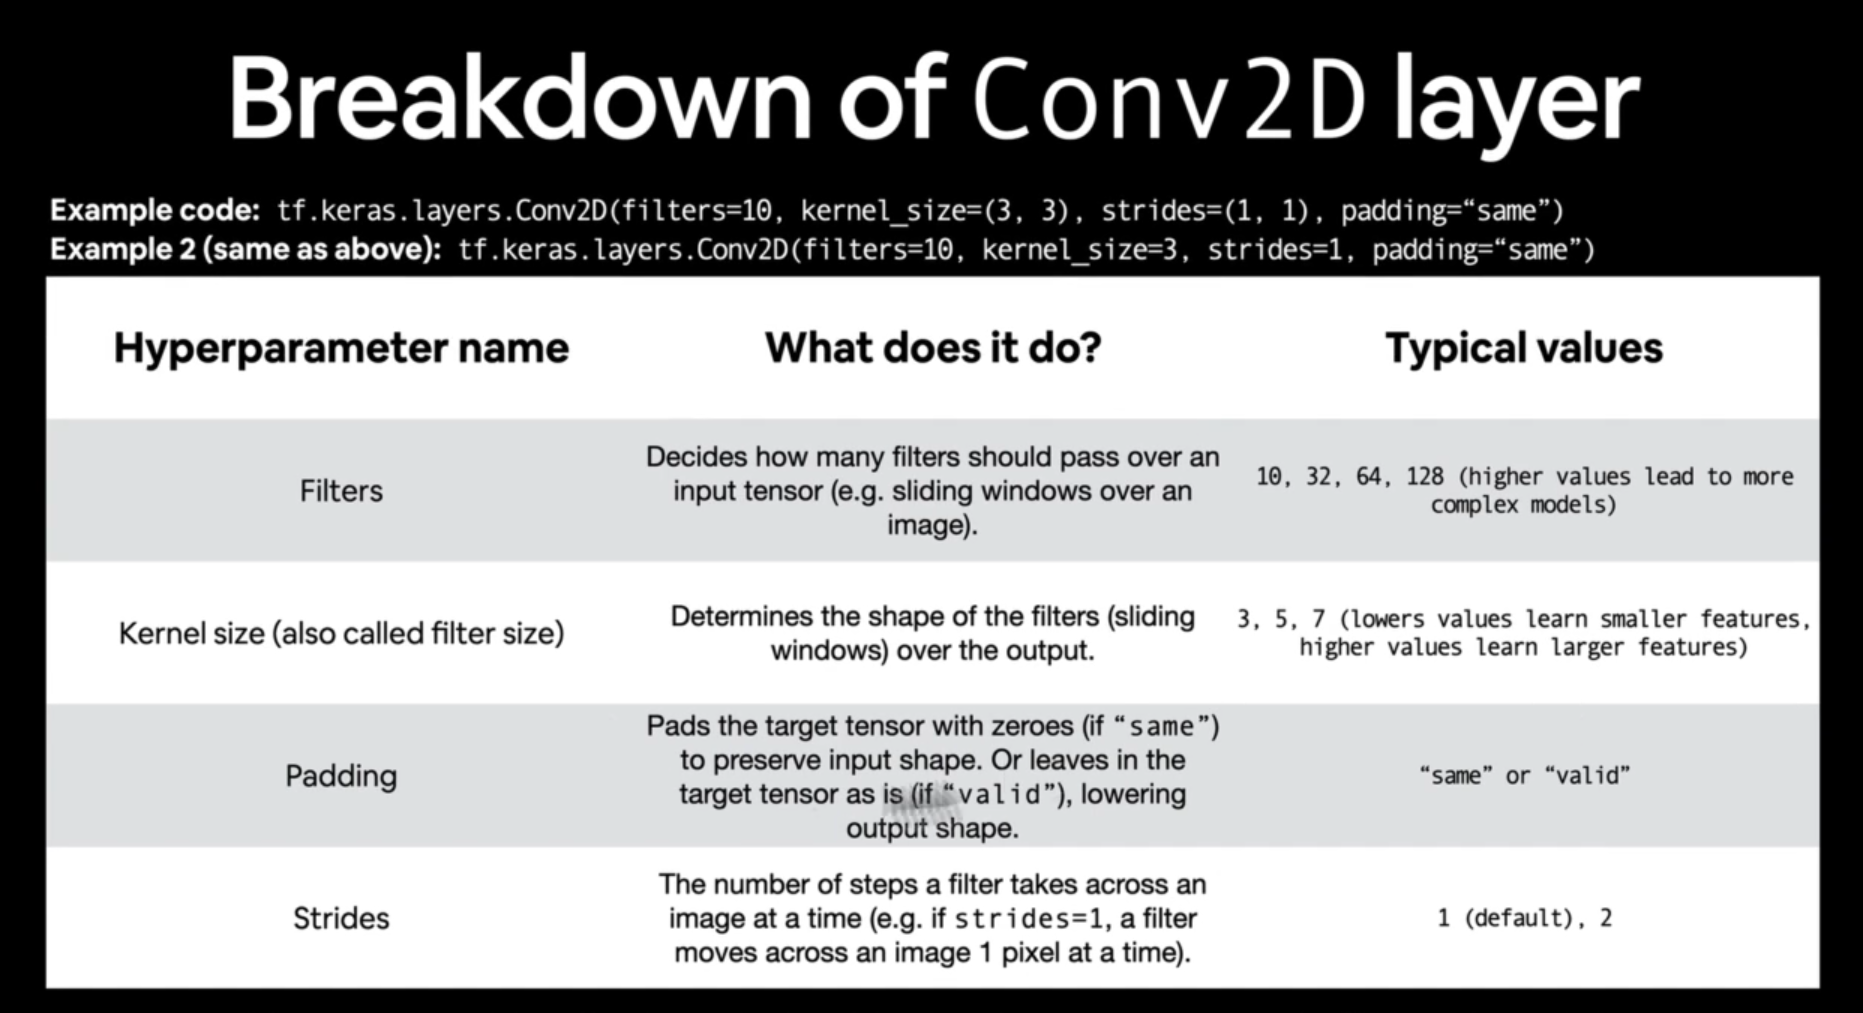

In [15]:
# model4.evaluate(test_data)

In [16]:
# Correct `validation_steps`
validation_steps = test_data.samples // test_data.batch_size

history4 = model4.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = validation_steps
           )

Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 429ms/step - accuracy: 0.5913 - loss: 4.5756 - val_accuracy: 0.8000 - val_loss: 0.4375
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.4202
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.7933 - loss: 0.4388 - val_accuracy: 0.8417 - val_loss: 0.3978
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.3949
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.8520 - loss: 0.3613 - val_accuracy: 0.8083 - val_loss: 0.3849


In [17]:
model4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.8144 - loss: 0.3705


[0.384378045797348, 0.8080000281333923]


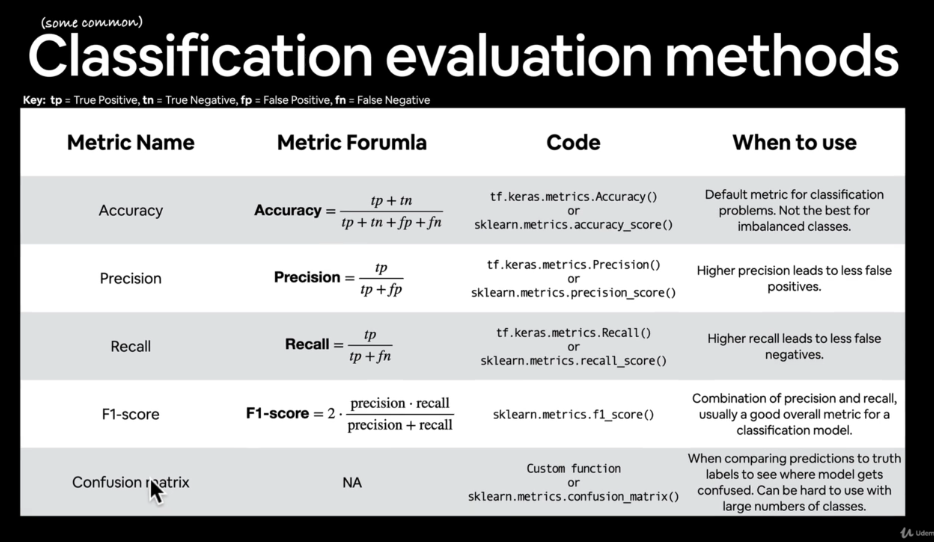

<Axes: >

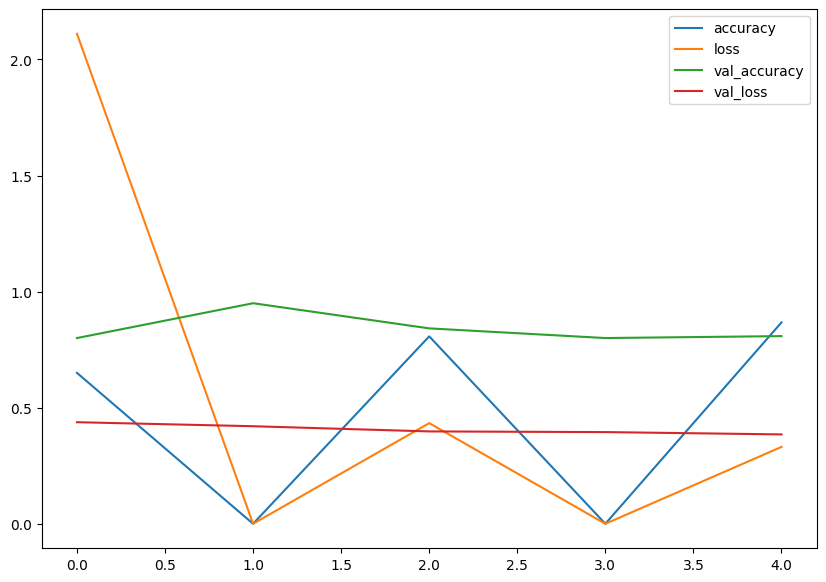

In [19]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [23]:
import matplotlib.pyplot as plt
def plot_loss_curve(history):
    """
    Returns seperate loss curve for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss'])) #how many epochs did we run for
    
    # plot the loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
    

> **Note:** When a models val loss starts to increase , its likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset too well and thus models ability to generalize to unseen data will be diminished.

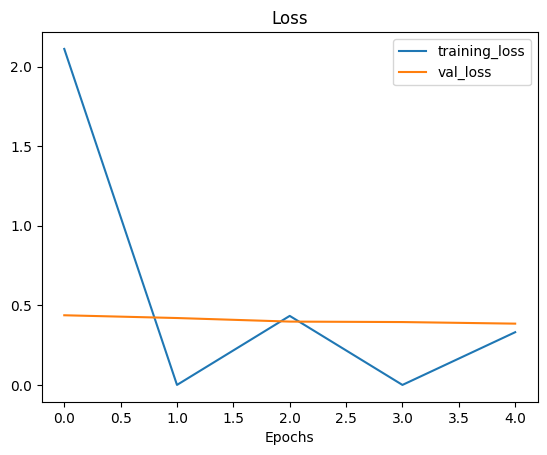

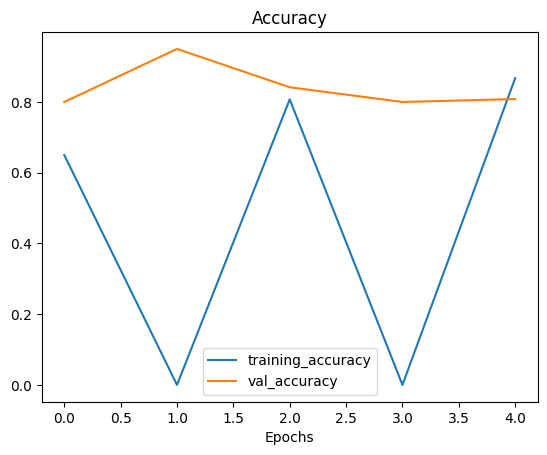

In [24]:
# Check out the loss and accuracy curves
plot_loss_curve(history4)

### Adjust the model parameter
Fitting a ML model comes in 3 steps
1. Create a baseline model
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways:
* Increase the no of conv layer
* Increase the no of conv filter
* Add another dense layer to output of our flattened data

Reduce overfitting:
* Add data augmentation
* Add reularization layers (such as MaxPool2D)
* Add more data...

> Reducing overfitting is also called **Regularization**

In [25]:
model5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [31]:

validation_steps = test_data.samples // test_data.batch_size

history5 = model5.fit(train_data,
              epochs = 5,
              steps_per_epoch = len(train_data),
              validation_data = test_data,
              validation_steps = validation_steps
              )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 307ms/step - accuracy: 0.8224 - loss: 0.4076 - val_accuracy: 0.8583 - val_loss: 0.3381
Epoch 2/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.2200
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.8351 - loss: 0.3793 - val_accuracy: 0.8625 - val_loss: 0.3343
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4901
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.8519 - loss: 0.3681 - val_accuracy: 0.8542 - val_loss: 0.3533


In [32]:
model5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [33]:
model5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.8376 - loss: 0.3728


[0.35045114159584045, 0.8579999804496765]

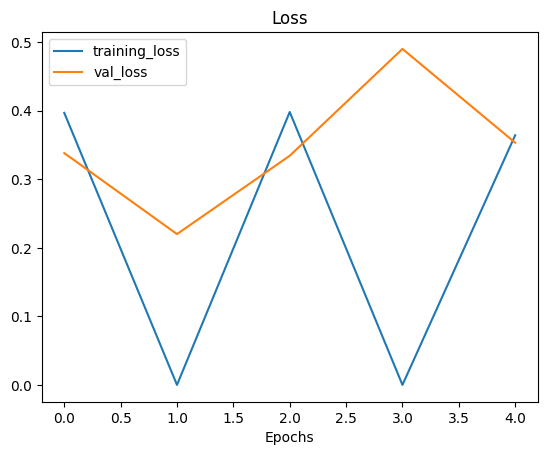

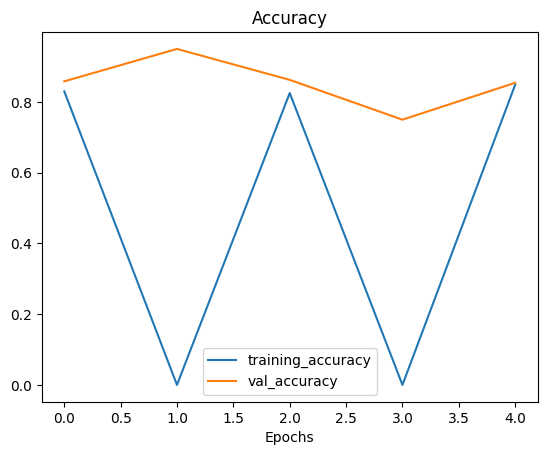

In [35]:
plot_loss_curve(history5)

In [ ]:
# Lets do data data augmentation
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)


# For test data
test_datagen = ImageDataGenerator(rescale = 1/255.)

## What exactly is Data Augmentation
Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable patterns. Altering might mean adjusting the rotation, flipping img, cropping or something similar


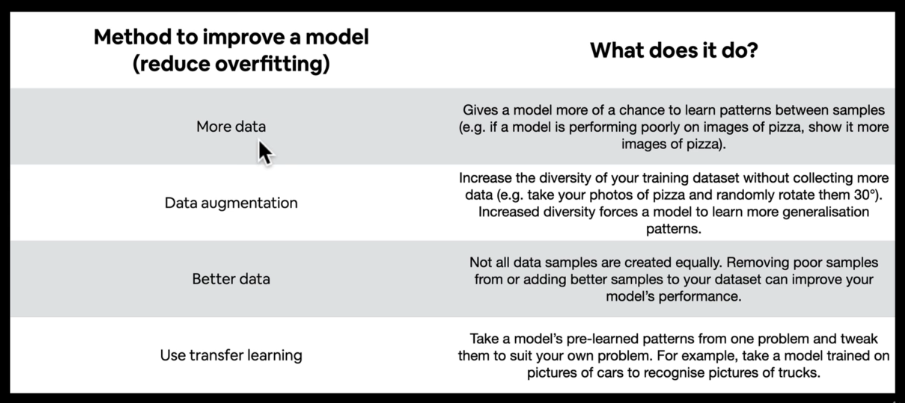